# Cargando las librerias requeridas

# Tarea 1 (fecha de entrega 18 de Noviembre, 23:59:59 por webcursos)
### Se permiten grupos de hasta 4 personas
Para esta tarea analizaremos una base de datos de 21.613 casas y 21 variables (datosCasas.csv).

In [ ]:
#Instalando las librerias requeridas
# import sys
# !{sys.executable} -m pip install numpy, pandas, plotnine, sklearn

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# Ejercicio 1 (1 punto)
Cargue la base de datos, realice un proceso de limpieza y haga una selección de variables en forma justificada. En su selección descarte si o si las últimas 5 variables (zipcode, lat, long, sqft_living15, sqft_lot15)

In [80]:
%config IPCompleter.greedy=True
datosCasas = pd.read_csv("datosCasas.csv")
#datosCasas.describe()
print(datosCasas.describe())
print(datosCasas.shape)

ejer_1 = datosCasas.drop(['zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],axis=1)
# print(ejer_1.shape)
#print(ejer_1.columns)
dataBox = ejer_1.drop(['id','date'],axis=1)


                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

### Missing values

Comprobando datos faltantes, en este caso el count de cada variable es igual a su dimensiòn 21.613, esto quiere decir que no hay valores nulos. Para corroborar se utuliza la siguiente función:

In [81]:
#Hay valores nulos
datosCasas.isnull().values.any()

False

### Tipo de datos 

Veremos que tipo de datos son.

In [51]:
datosCasas.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Plots y Visualización de los datos


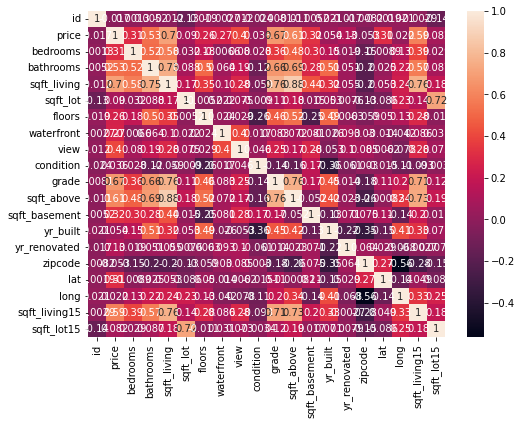

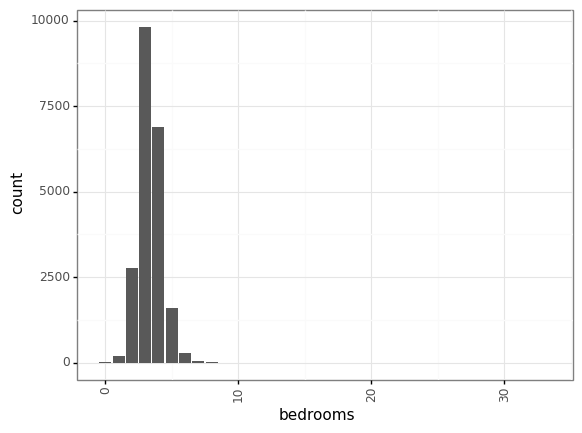

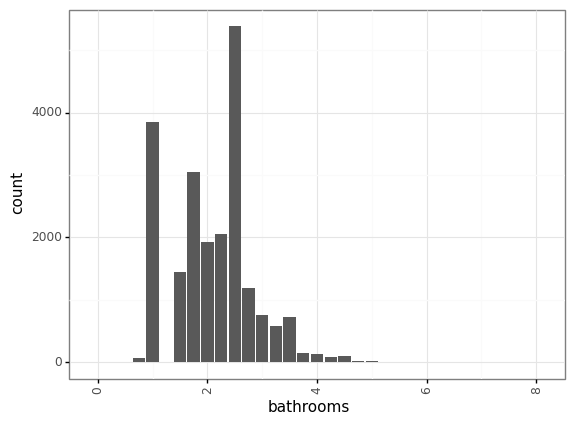

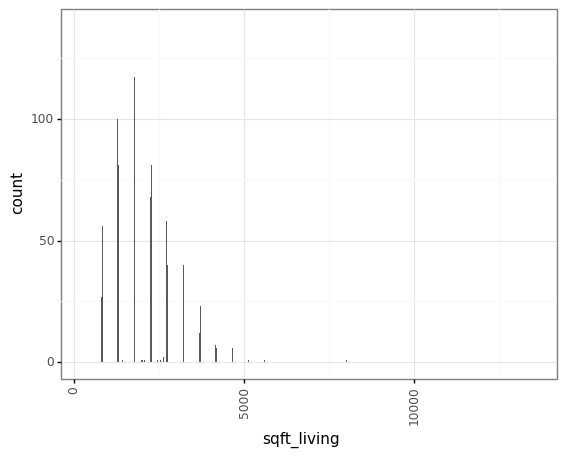

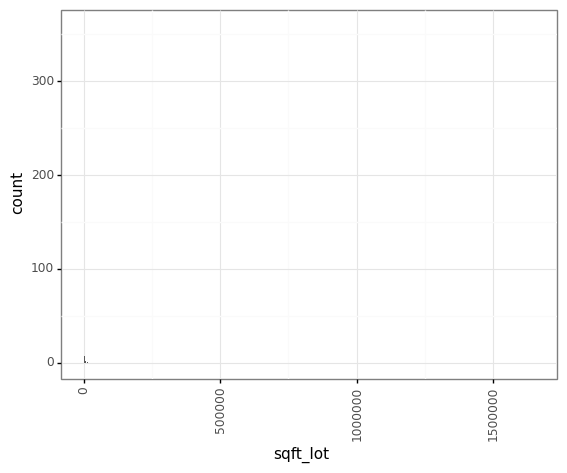

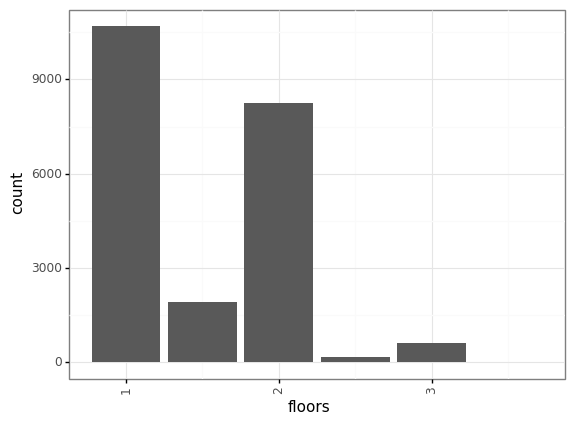

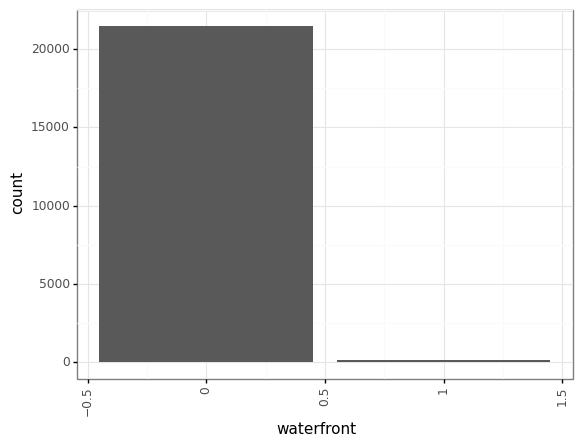

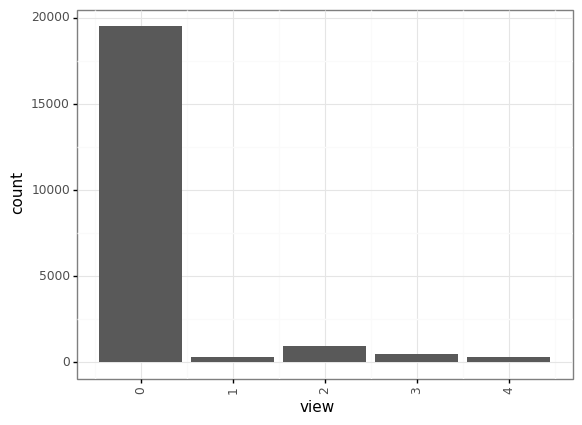

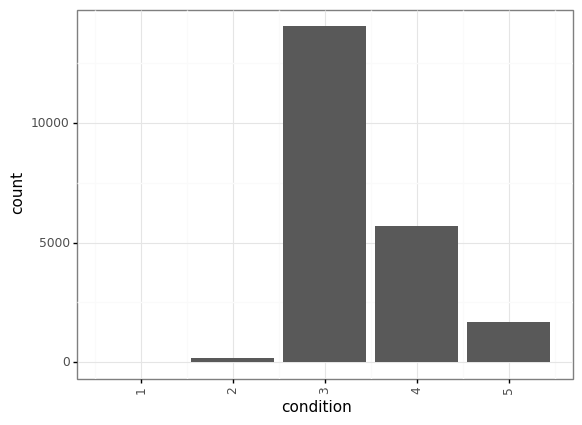

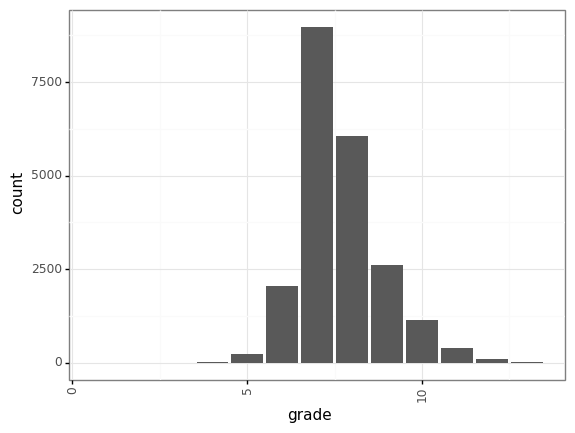

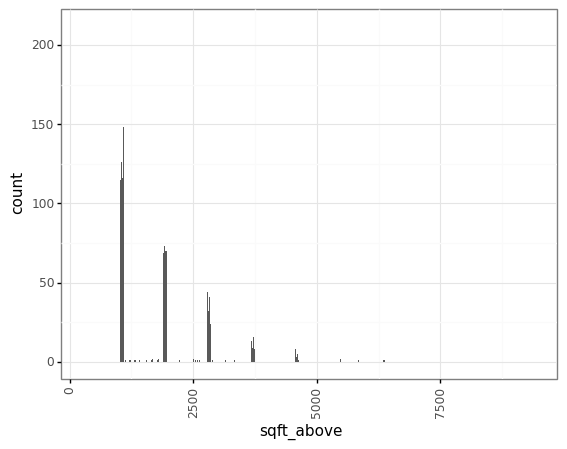

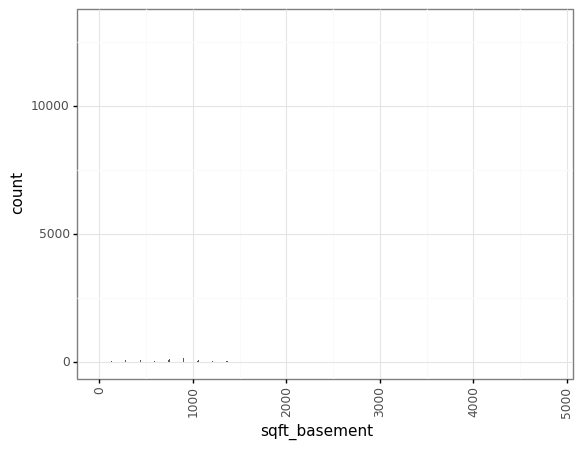

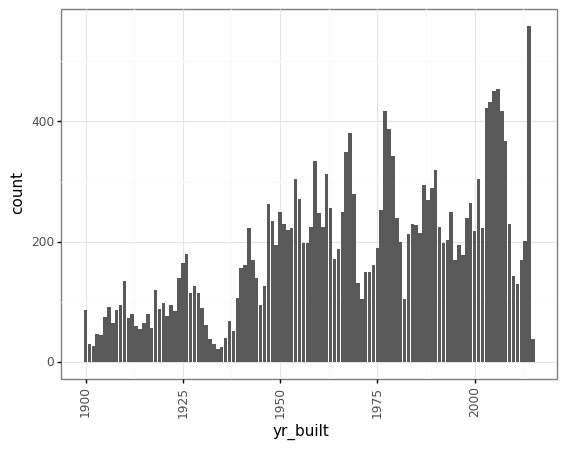

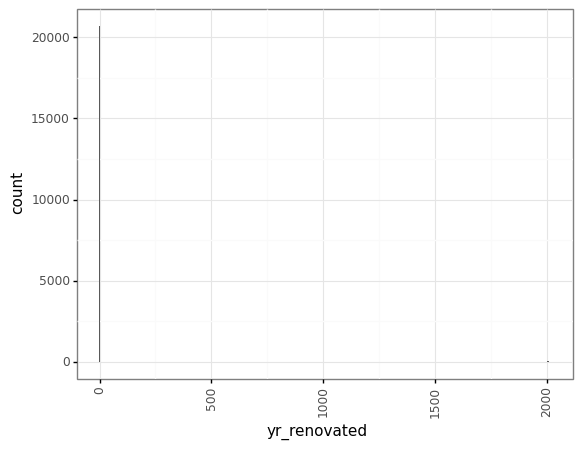

In [90]:
#datos_view= datosCasas[datosCasas["view"]==1]
#datos_view.plot(kind="scatter", x="bedrooms", y="price")

datos_view= datosCasas[datosCasas["view"]==1 && ]
corr_df = datosCasas.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()
#Gráficos de BARRAS
for i in range(1,len(dataBox.columns)):
  data2 = dataBox.columns[i]
  fig= (ggplot(data=ejer_1, mapping=aes(x=data2)) + geom_bar() + theme_bw() + theme(axis_text_x = element_text(angle=90)))
  print(fig)

# Ejercicio 2, k-means (2 puntos)
* Busque el mejor número de clusters utilizando el método del codo para k-means.
* Aplique la clusterización usando el número de clusters seleccionados. 
* Describa los clusters encontrados, indicando las caracteristicas significativas de cada uno de ellas. 
* Aplique PCA y visualize los clusters encontrados, concluya. 
* Grafique cada una de las casas utilizando la latitud y longitud (utilice puntos de distintos colores según el cluster asignado). Revise si alguno de los clusters corresponde a alguna zona geógrafica en particular (si todos los puntos de un cluster se ven fuertemente agrupados en una sola zona)

In [46]:
from scipy.spatial import distance_matrix
datosCasas.head()

#Calculando las distancias por el precio de las casas

#casas= datosCasas.columns.values.toList()[1:]

#precio= data.columns.values.tolist(1,)
#dd1 = distance_matrix(casas, casas, p=1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Ejercicio 3, otro modelo (2 puntos)
* Seleccione algún otro modelo entre DBScan, Hierarchical, y GMM
* Busque el mejor número de clusters utilizando el método seleccionado.
* Aplique la clusterización usando el número de clusters seleccionados. 
* Describa los clusters encontrados, indicado las caracteristicas significativas de cada uno de ellas. 
* Aplique PCA y visualize los clusters encontrados, concluya. 
* Grafique cada una de las casas utilizando la latitud y longitud (utilice puntos de distintos colores según el cluster asignado). Revise si alguno de los clusters corresponde a alguna zona geógrafica en particular (si todos los puntos de un cluster se ven fuertemente agrupados en una sola zona)

# Ejercicio 4, comparación de resultados (1 punto)
* Compare los clusters generados del ejercicio 2 y 3
* Justifique cual de los dos métodos seleccionaría (podría ser ninguno o ambos) si quiere utilizar la clusterización obtenida para asignarle precios a las casas.
* Atención: la selección puede ser basada tanto en medidas de evaluación para clusters como simplemente basado en los clusters obtenidos, pero tiene que estar enfocado en la asignación de precios a las casas.